### Observable trends

In [1]:
%matplotlib notebook

In [2]:
# References
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Read data
city_data_df = pd.read_csv("resources/city_data.csv")
ride_data_df = pd.read_csv("resources/ride_data.csv")

In [4]:
ride_data_df = ride_data_df.groupby("city")["fare"].agg([("Avg Fare","mean"),("Total Fare","sum")]).\
                    join(\
                    ride_data_df.groupby("city")["ride_id"].agg([("Total Ride","count")])).\
                    reset_index()

In [5]:
city_ride_data_df = pd.merge(city_data_df,ride_data_df,on="city",how="left").fillna(0.000).\
                    rename(columns={"type":"City Type","city":"City","driver_count":"Driver Count"})
#city_ride_data_df["Bubble Area"] = np.sqrt(city_ride_data_df["Driver Count"])
#city_ride_data_df["Driver Count"] = city_ride_data_df["Driver Count"]#.astype(float)


In [6]:
# Get totals and set pie chart parameters
total_rides = city_ride_data_df["Total Ride"].sum()
total_fares = city_ride_data_df["Total Fare"].sum()
total_drivers = city_ride_data_df["Driver Count"]
# Gold, Sky Blue, Coral
colors = ["#FFD700","#76D7EA","#FF7F50"]
autopct="%1.1f%%"
explodes = (0,0,0.15)
figsize=(8,5)

In [7]:
#Average Fare ($) Per City
#Total Number of Rides Per City
#Total Number of Drivers Per City
#City Type (Urban, Suburban, Rural)
#city_ride_data_df.sort_values(["City Type","City"], inplace=True)
city_ride_data_df.head()

,City,Driver Count,City Type,Avg Fare,Total Fare,Total Ride
0,Richardfort,38,Urban,22.373214,626.45,28
1,Williamsstad,59,Urban,24.362174,560.33,23
2,Port Angela,67,Urban,23.836842,452.90,19
3,Rodneyfort,34,Urban,28.616957,658.19,23
4,West Robert,39,Urban,25.123871,778.84,31


<IPython.core.display.Javascript object>


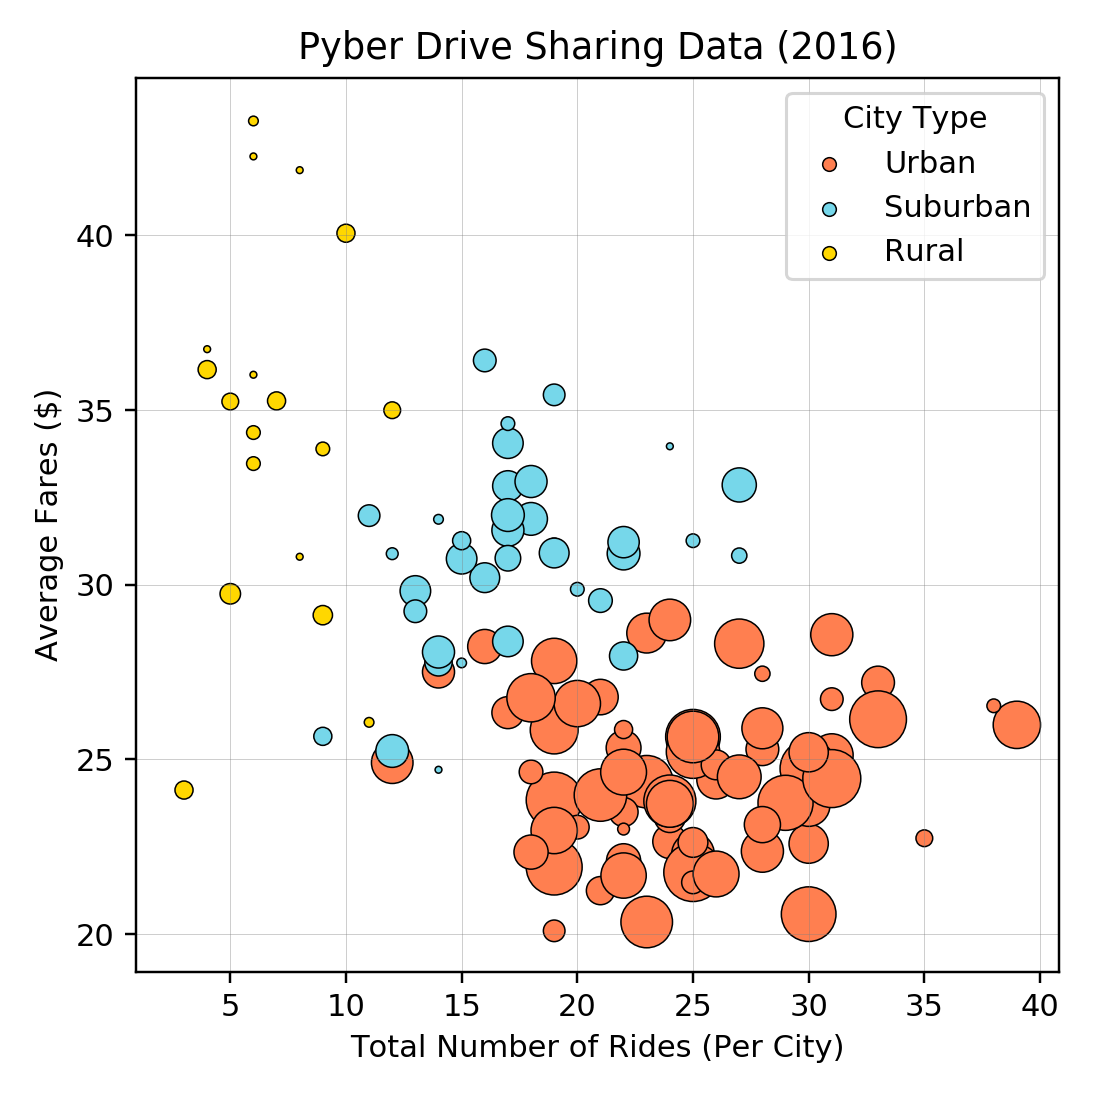

In [8]:
x  = city_ride_data_df["Total Ride"]
y  = city_ride_data_df["Avg Fare"]
s  = city_ride_data_df["Driver Count"]
ct = city_ride_data_df["City Type"]
unique_city_type = ct.unique()
ct_colors ={"Urban":"#FF7F50", "Suburban":"#76D7EA","Rural":"#FFD700"}

fig, ax = plt.subplots(figsize=(5,5))

for i, city_type in enumerate(unique_city_type):
    xi = [x[j] for j  in range(len(x)) if ct[j] == city_type]
    yi = [y[j] for j  in range(len(x)) if ct[j] == city_type]
    si = [s[j]*5 for j  in range(len(x)) if ct[j] == city_type]
    plt.scatter(x=xi, y=yi, s=si, c=ct_colors[city_type], label=str(city_type), linewidths=0.5, edgecolors="black")
    
    ##print(f"i = {i} (xi,yi,si) points = {len(xi)} city_type = {city_type} ")
    
lgnd = plt.legend(frameon=True,title="City Type",loc="upper right")
for handle in lgnd.legendHandles:
    handle.set_sizes([20])

ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
ax.set_title('Pyber Drive Sharing Data (2016)')
ax.set_xlabel('Total Number of Rides (Per City)')
ax.set_ylabel('Average Fares ($)')

plt.tight_layout()
plt.show()
plt.savefig('pyber_data.png')

<IPython.core.display.Javascript object>


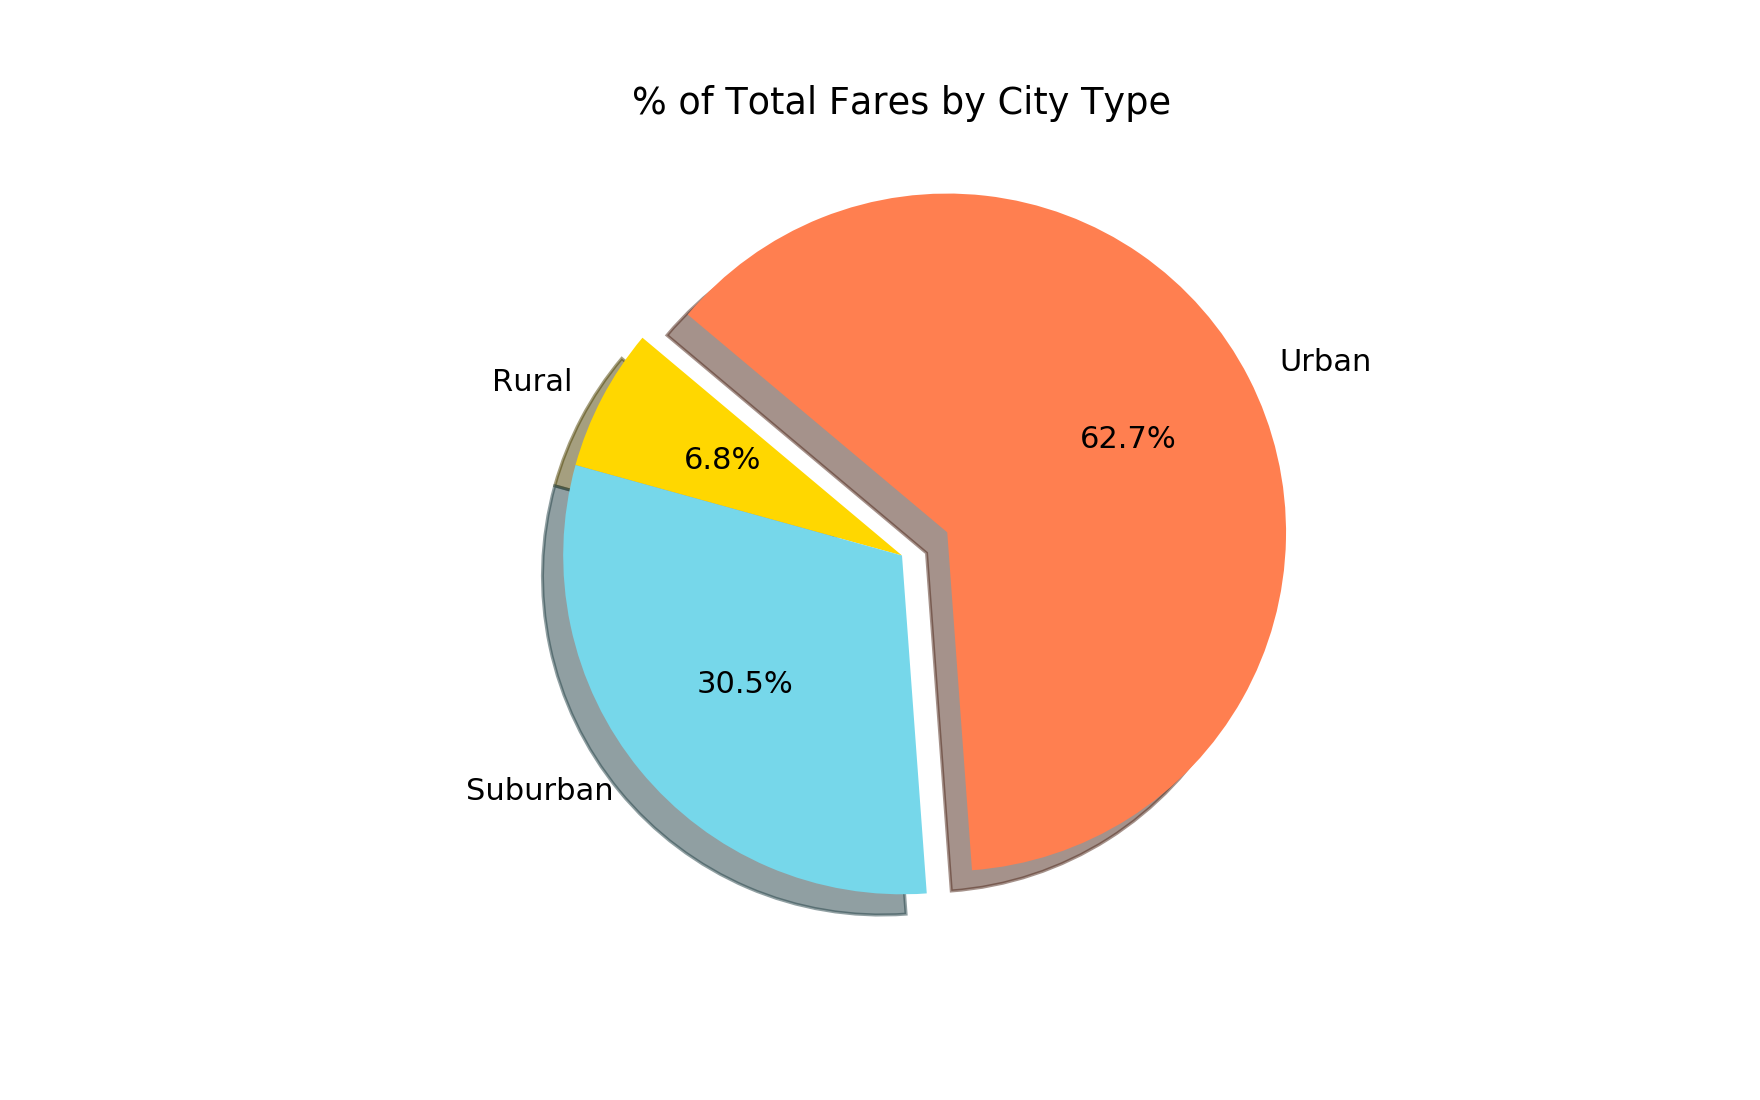

Text(0.5, 1.0, '% of Total Fares by City Type')

In [9]:
#% of Total Fares by City Type
fares_city_type = (city_ride_data_df.groupby("City Type")["Total Fare"].\
                                    agg([("% of Total Fare","sum")])/total_fares)

fares_plot = fares_city_type.plot.pie(["% of Total Fare"], 
                                      legend=False,
                                     explode=explodes,
                                     startangle=140,
                                     shadow=True,
                                     figsize=figsize,
                                     colors=colors,
                                     autopct=autopct)
                                      
fares_plot.set_ylabel("")       
fares_plot.set_title("% of Total Fares by City Type", fontsize=12)


<IPython.core.display.Javascript object>


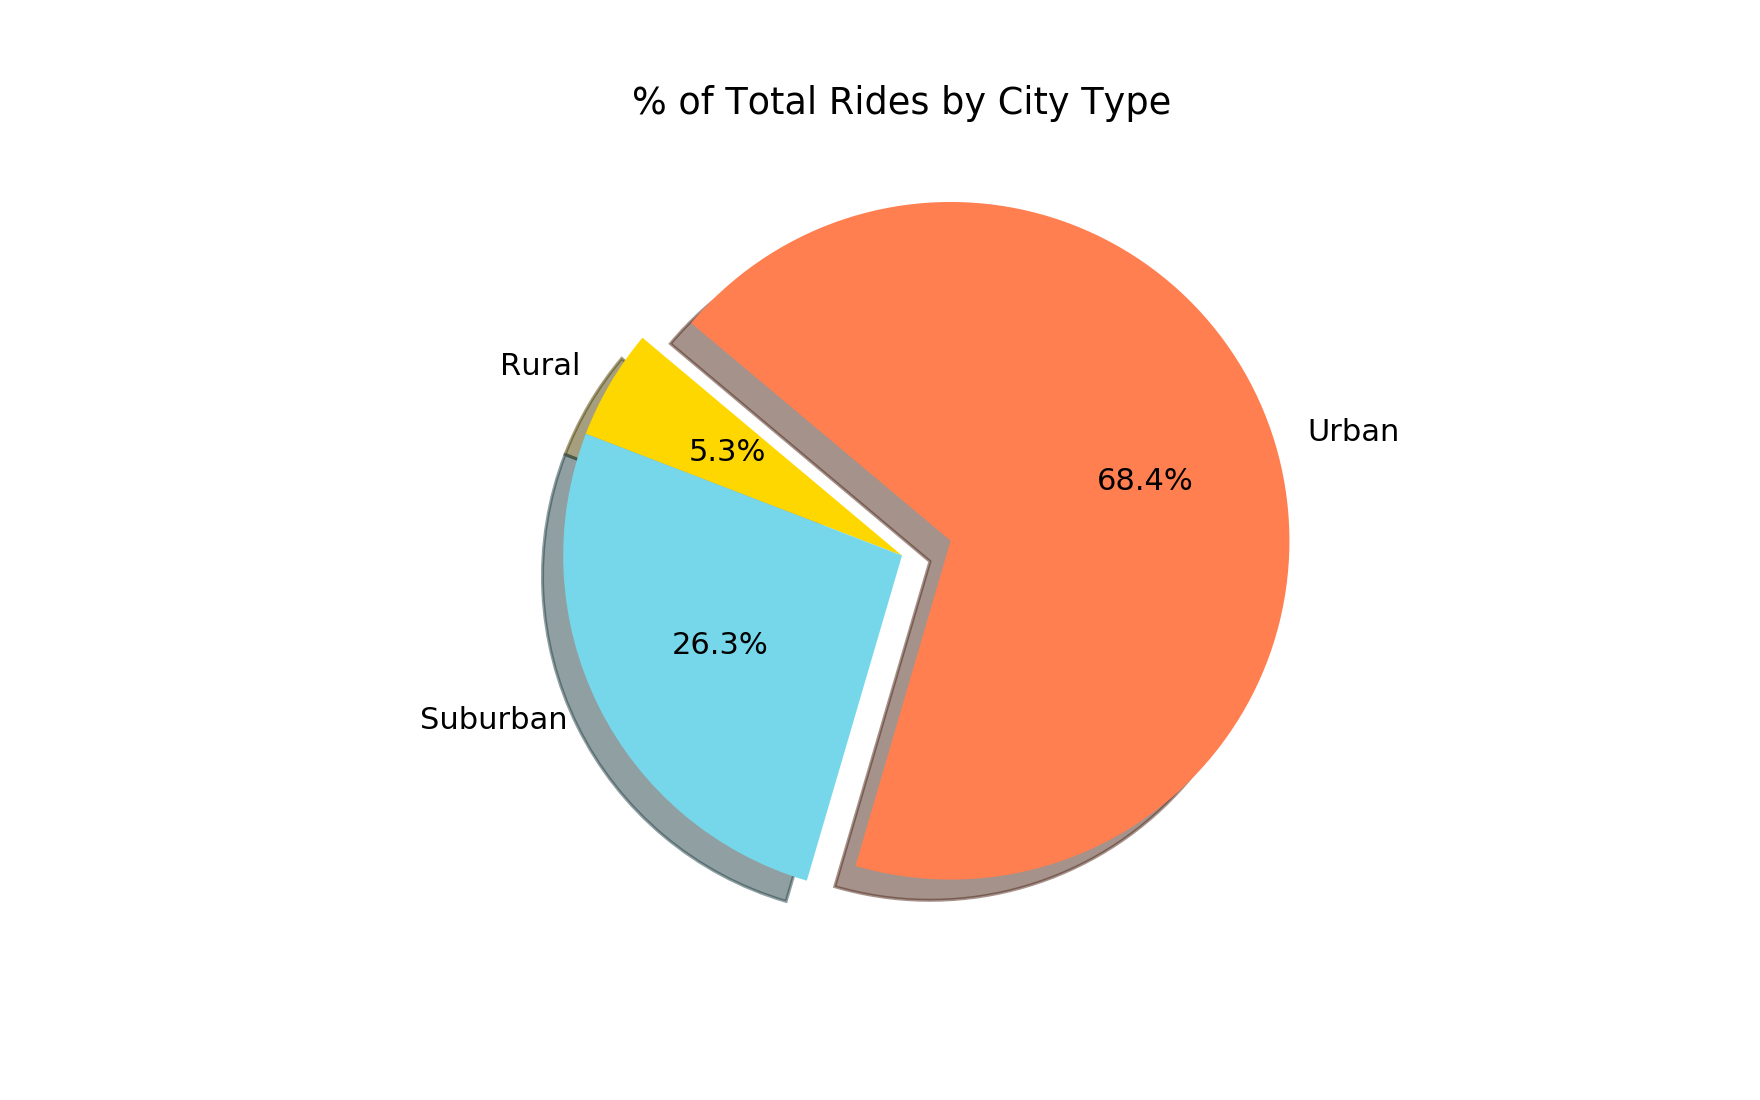

Text(0.5, 1.0, '% of Total Rides by City Type')

In [10]:
#% of Total Rides by City Type
rides_city_type = (city_ride_data_df.groupby("City Type")["Total Ride"].\
                                      agg([("% of Total Rides","sum")])/total_rides)

rides_plot = rides_city_type.plot.pie(["% of Total Rides"], \
                                      legend=False,\
                                     explode=explodes,\
                                     startangle=140,
                                     figsize=figsize,
                                     shadow=True,
                                     colors=colors,\
                                     autopct=autopct)
                                      
rides_plot.set_ylabel("")       
rides_plot.set_title("% of Total Rides by City Type", fontsize=12)


<IPython.core.display.Javascript object>


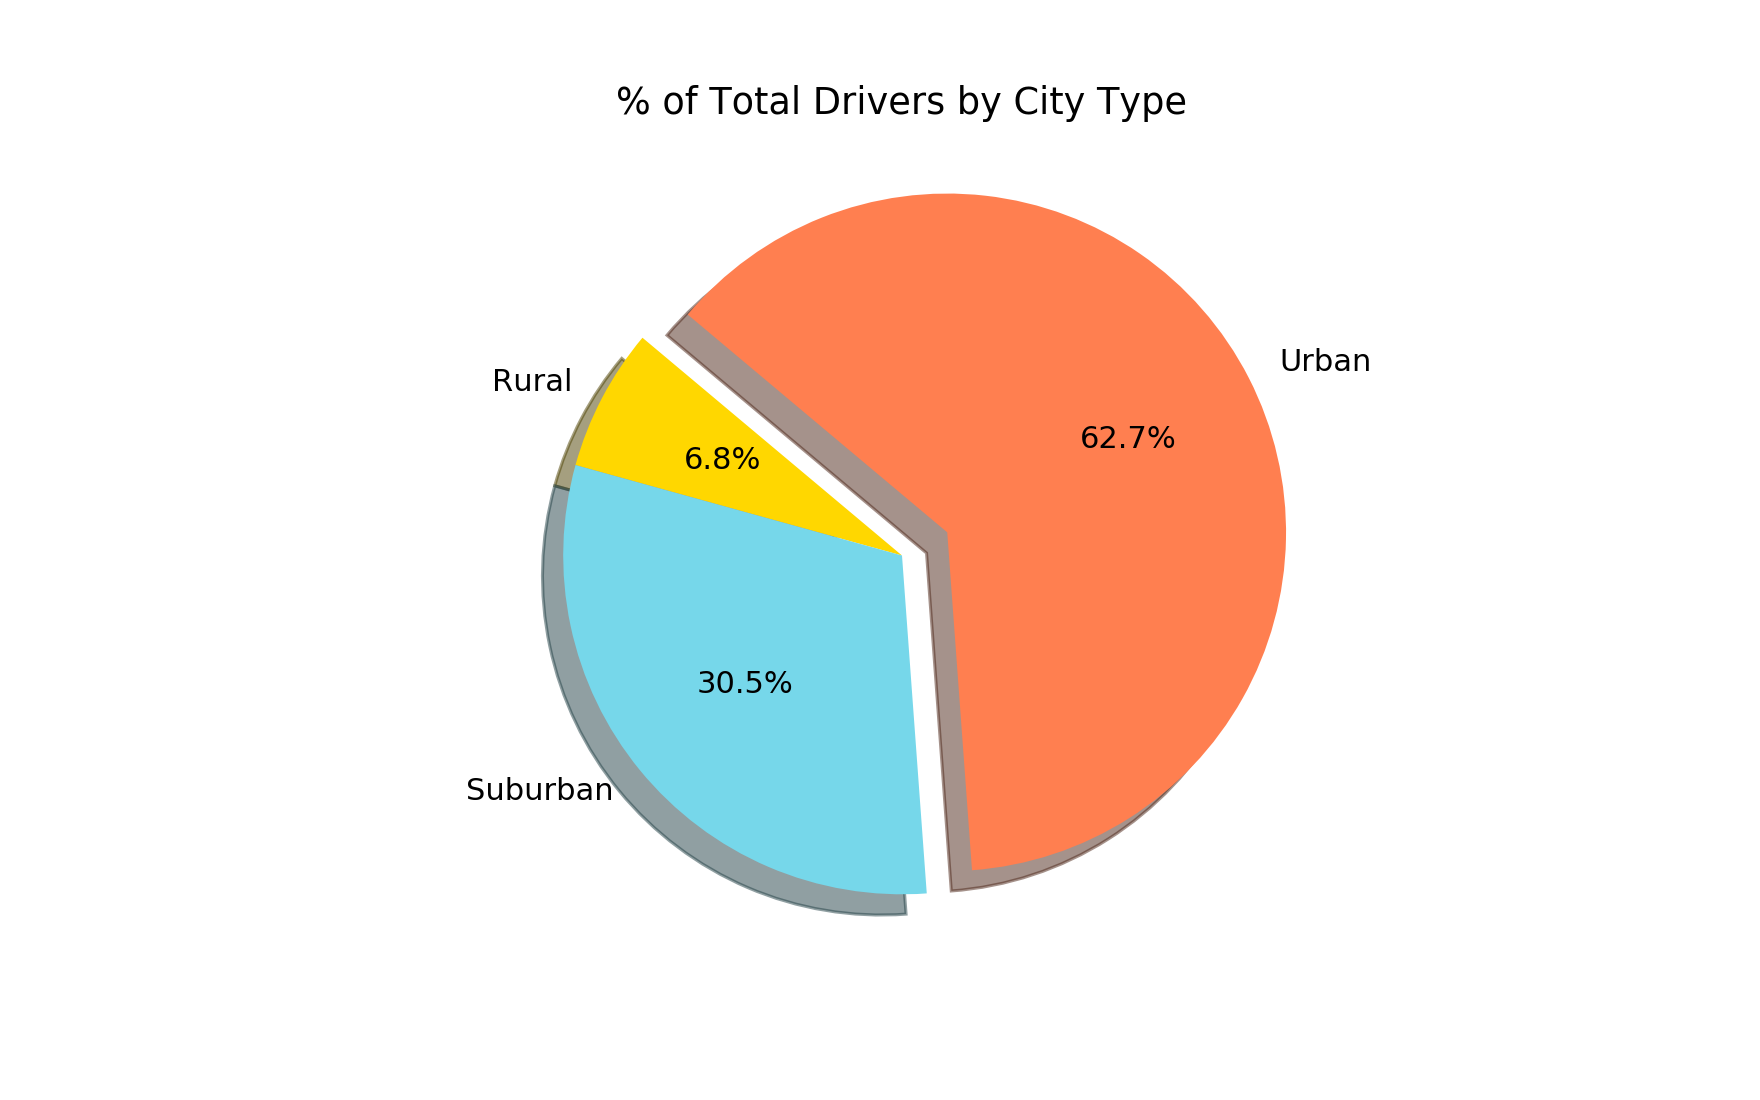

Text(0.5, 1.0, '% of Total Drivers by City Type')

In [11]:
#% of Total Drivers by City Type
drivers_city_type = (city_ride_data_df.groupby("City Type")["Driver Count"].\
                                      agg([("% of Total Drivers","sum")])/total_drivers)
drivers_plot = fares_city_type.plot.pie(["% of Total Fare"], 
                                      legend=False,
                                     explode=explodes,
                                     startangle=140,
                                     figsize=figsize,
                                     shadow=True,
                                     colors=colors,
                                     autopct=autopct)
                                      
drivers_plot.set_ylabel("")       
drivers_plot.set_title("% of Total Drivers by City Type", fontsize=12)